In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls /content/gdrive/MyDrive/movielens/

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
train = pd.read_csv("/content/gdrive/MyDrive/movielens/ua.base", sep="\t", names=["user", "movie", "rating", "timestamp"])
test = pd.read_csv("/content/gdrive/MyDrive/movielens/ua.test", sep="\t", names=["user", "movie", "rating", "timestamp"])

In [16]:
users = torch.LongTensor(train['user'])
items = torch.LongTensor(train['movie'])
ratings = torch.FloatTensor(train['rating'])

users_test = torch.LongTensor(test['user'])
items_test = torch.LongTensor(test['movie'])
ratings_test = torch.FloatTensor(test['rating'])

In [18]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

optimizer = torch.optim.Adam([P, Q], lr=0.1)

X = []
Y = []
Y_test = []

for epoch in range(1000):

    hypo = (P[items] * Q[users]).sum(dim=1)
    cost = F.mse_loss(hypo, ratings)
 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()



    with torch.no_grad():
        
        hypo_test = (P[items_test] * Q[users_test]).sum(dim=1)
        cost_test = F.mse_loss(hypo_test, ratings_test)

        X.append(epoch)
        Y.append(cost)
        Y_test.append(cost_test)

        if epoch % 100 == 0:
            print(f"epoch: {epoch}, mse: {cost:.6f}, mse_test: {cost_test:.6f}")

epoch: 0, mse: 24.426987, mse_test: 22.774019
epoch: 100, mse: 0.575385, mse_test: 1.547055
epoch: 200, mse: 0.498561, mse_test: 1.858127
epoch: 300, mse: 0.473936, mse_test: 2.247037
epoch: 400, mse: 0.462293, mse_test: 2.717107
epoch: 500, mse: 0.455950, mse_test: 3.295479
epoch: 600, mse: 0.452129, mse_test: 3.902999
epoch: 700, mse: 0.449612, mse_test: 4.561719
epoch: 800, mse: 0.447758, mse_test: 5.264279
epoch: 900, mse: 0.446382, mse_test: 6.007288


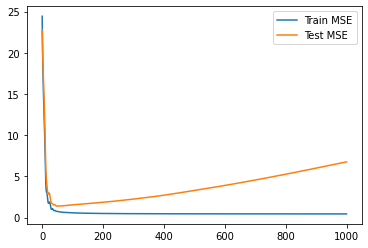

In [19]:
plt.plot(X, Y, label="Train MSE")
plt.plot(X, Y_test, label="Test MSE")
plt.legend()
plt.show()

In [20]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

optimizer = torch.optim.Adam([P, Q], lr=0.1)

X = []
Y = []
Y_test = []
lambda_P = 0.0001
lambda_Q = 0.0001

for epoch in range(1000):

    hypo = (P[items] * Q[users]).sum(dim=1)
    mse = F.mse_loss(hypo, ratings)
    cost = mse + lambda_P * (P ** 2).sum() + lambda_Q * (Q ** 2).sum()
 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()



    with torch.no_grad():
        
        hypo_test = (P[items_test] * Q[users_test]).sum(dim=1)
        mse_test = F.mse_loss(hypo_test, ratings_test)

        X.append(epoch)
        Y.append(mse.item())
        Y_test.append(mse_test.item())

        if epoch % 100 == 0:
            print(f"epoch: {epoch}, mse: {mse:.6f}, mse_test: {mse_test:.6f}")


epoch: 0, mse: 24.008469, mse_test: 21.944254
epoch: 100, mse: 0.692299, mse_test: 1.052575
epoch: 200, mse: 0.643764, mse_test: 1.055156
epoch: 300, mse: 0.632871, mse_test: 1.057724
epoch: 400, mse: 0.629666, mse_test: 1.055894
epoch: 500, mse: 0.628333, mse_test: 1.054810
epoch: 600, mse: 0.627663, mse_test: 1.054230
epoch: 700, mse: 0.627198, mse_test: 1.053980
epoch: 800, mse: 0.626809, mse_test: 1.053956
epoch: 900, mse: 0.626498, mse_test: 1.053920


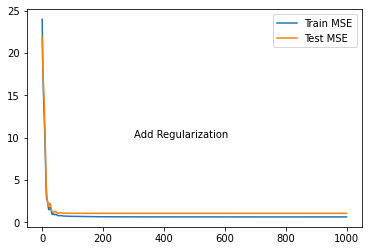

In [21]:
plt.plot(X, Y, label="Train MSE")
plt.plot(X, Y_test, label="Test MSE")
plt.annotate("Add Regularization",(300,10))
plt.legend()
plt.show()

In [22]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item() 

optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)

X = []
Y = []
Y_test = []
lambda_P = 0.0001
lambda_Q = 0.0001
lambda_BI = 0.0001
lambda_BU = 0.0001

for epoch in range(1000):

    hypo = (P[items] * Q[users]).sum(dim=1) + mean + bias_item[items] + bias_user[users]
    mse = F.mse_loss(hypo, ratings)
    cost = mse + lambda_P * (P ** 2).sum() + lambda_Q * (Q ** 2).sum() + \
            lambda_BI * (bias_item **2).sum() + lambda_BU * (bias_user **2).sum()
 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad():
        
        hypo_test = (P[items_test] * Q[users_test]).sum(dim=1) + \
                    mean + bias_item[items_test] + bias_user[users_test]
        mse_test = F.mse_loss(hypo_test, ratings_test)

        X.append(epoch)
        Y.append(mse.item())
        Y_test.append(mse_test.item())

        if epoch % 100 == 0:
            print(f"epoch: {epoch}, mse: {mse}, mse_test: {mse_test}")

epoch: 0, mse: 13.767125129699707, mse_test: 10.838435173034668
epoch: 100, mse: 0.6058236956596375, mse_test: 0.8789447546005249
epoch: 200, mse: 0.5797752141952515, mse_test: 0.8700986504554749
epoch: 300, mse: 0.5761741399765015, mse_test: 0.8688960075378418
epoch: 400, mse: 0.5748860239982605, mse_test: 0.8675019145011902
epoch: 500, mse: 0.5742839574813843, mse_test: 0.8668931722640991
epoch: 600, mse: 0.5739847421646118, mse_test: 0.866948664188385
epoch: 700, mse: 0.573822021484375, mse_test: 0.8671154379844666
epoch: 800, mse: 0.5737295150756836, mse_test: 0.8670694231987
epoch: 900, mse: 0.5736625790596008, mse_test: 0.8666079044342041


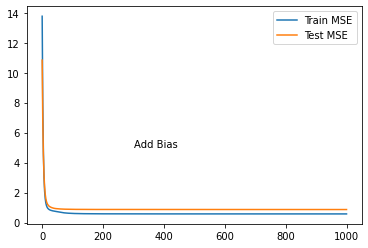

In [24]:
plt.plot(X, Y, label="Train MSE")
plt.plot(X, Y_test, label="Test MSE")
plt.annotate("Add Bias",(300,5))
plt.legend()
plt.show()